# 1.Business Understanding

In this lab, our primary task is to compare the performance of logistic regression optimization implemented in scikit-learn with our own implementation. We will select a dataset which contains more than two classes to predict so as to qualify for a multi-class prediction task. Later, we will also modify the optimization procedure for logistic regression and pick the best out of them to battle against the equivalent scikit-learn implementation and find out the better one. 

We have chosen the **World University Ranking** dataset from Kaggle, which contains .csv formatted data of top universities from around the world. The data contains around **2600 rows** of details about each of the universities arranged in a ranked order.

Each row contains information such as the universities name, rank, country, number of students, international student percentage, gender ratio, student to staff ratio and year in which the data was collected. The tabular data also contains an overall score for each university as well as separate scores for the teaching, research, citations, international outlook and industry income.

Our classification task is the **Total score** (total_score) obtained by the various universities. As per our dataset, there are different score values, which act as classes of scores.

The investigation through this task would be useful to the prospective students, current students, teachers, counselors and other people working in the higher education sector. The scores can be used by students to identify different sets of universities which have similar quality of education. Furthermore, the job recruiters from different industries can use the outcome of this task to shortlist their preferred universities for conducting recruitment drives.

If our implementation is successful in classifying the universities based on their scores with better accuracy than the scikit-learn implementation, we can deploy this model for business use.

# 2.Preparation and Overview

As usual, we will begin by loading the dataset from the .csv file.

In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('dataset/timesData.csv')

df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25.0,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27.0,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33.0,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22.0,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,0.0,94.2,"7,929",8.4,27.0,45 : 55,2011


We will look at the column information of our dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null float64
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null float64
total_score               2603 non-null float64
num_students              2544 non-null object
student_staff_ratio       2544 non-null float64
international_students    2536 non-null float64
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(8), int64(1), object(5)
memory usage: 284.8+ KB


Find the missing values in the data.

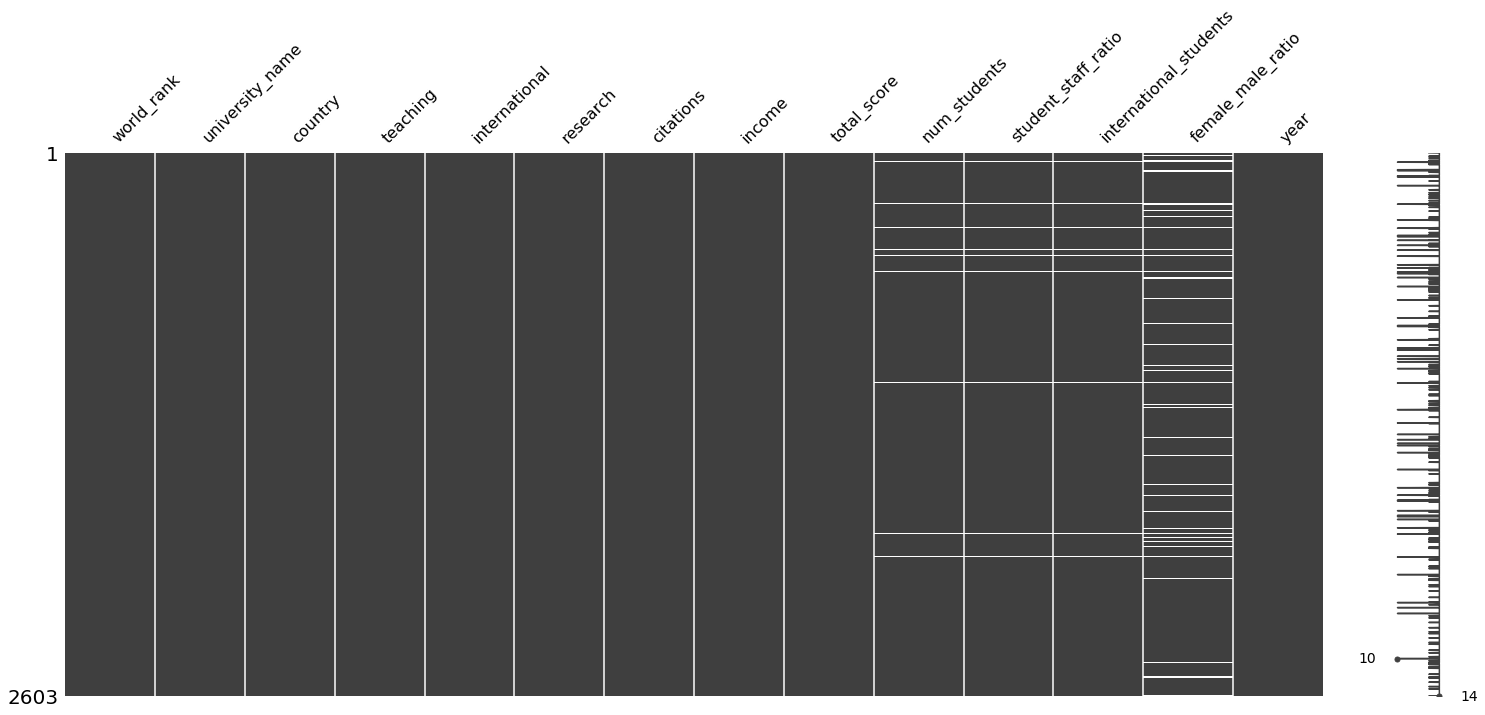

In [6]:
import missingno as mn
mn.matrix(df)

In [7]:
df.isnull().any()

world_rank                False
university_name           False
country                   False
teaching                  False
international             False
research                  False
citations                 False
income                    False
total_score               False
num_students               True
student_staff_ratio        True
international_students     True
female_male_ratio          True
year                      False
dtype: bool

Next, we will preprocess the data. To do this, we are filling the missing values with zeroes and converting the percentage values into float type. This is all that we require to do for preprocessing this data.

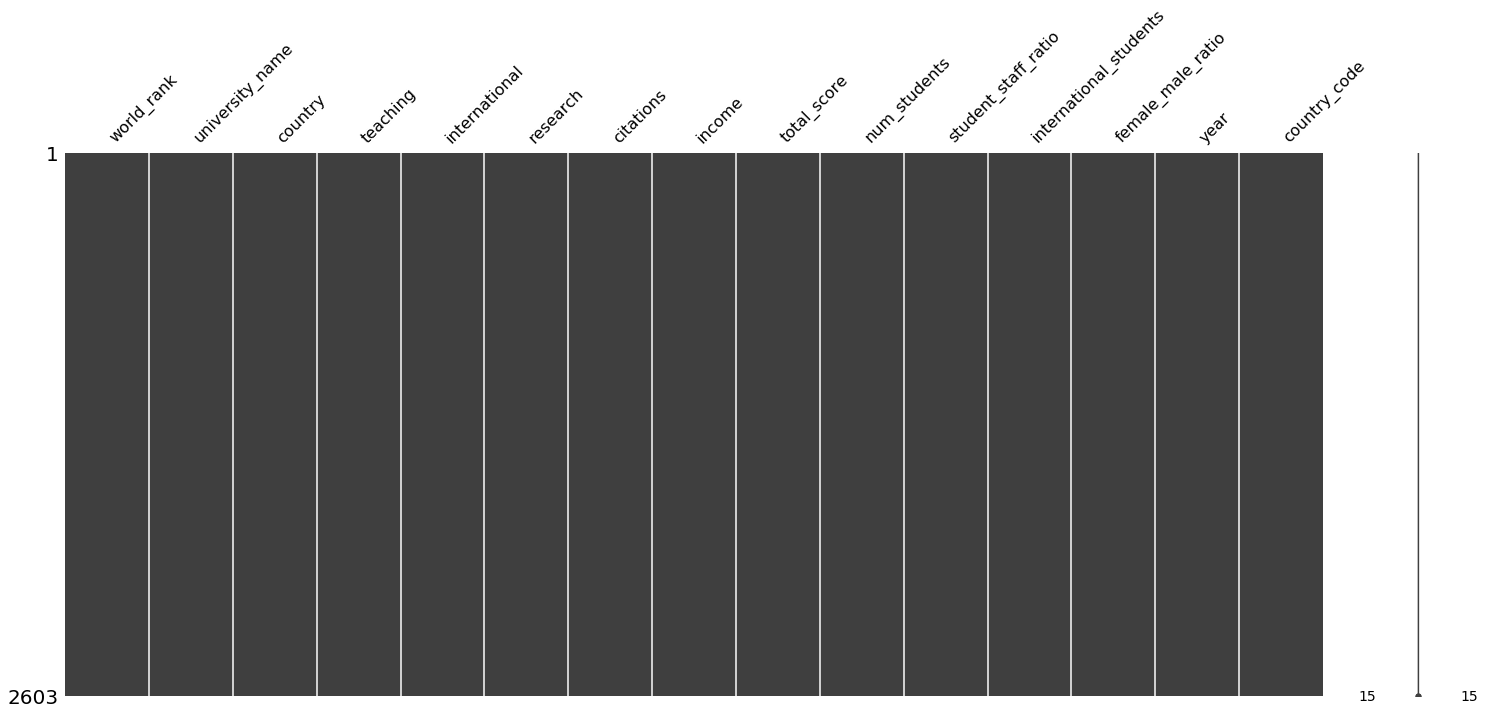

In [15]:
df['num_students'] = df['num_students'].fillna(value=0)
# df['international_students'] = df['international_students'].str.replace("%","").astype(float)
df['international_students'] = df['international_students'].fillna(value=0)
df['international_students'] = df['international_students']/100
df['student_staff_ratio'] = df['student_staff_ratio'].fillna(value=0)
df['female_male_ratio'] = df['student_staff_ratio'].fillna(value=0)
df['num_students'] = df['num_students'].str.replace(",","")
df['num_students'] = df['num_students'].astype(float)

to_replace = ['student_staff_ratio', 'num_students', 'international_students']


for i in to_replace:
    df[i] = df[i].replace(np.NaN, 0)
mn.matrix(df)

Here we are converting the column values from string to numeric using LabelEncoder.

Reference: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [16]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

labels = ['country']
for label in labels:
    df[label+'_code'] = lb_make.fit_transform(df[label])

Eliminating the columns which are not required, as these columns does not influence our outcome.
Also, we will be removing the target column from our data.

In [17]:
cols = list(df.columns)
cols.remove('total_score') #target column
cols.remove('world_rank')
cols.remove('university_name')
cols.remove('country')


X = df[cols]
X = np.array(X)

y = df['total_score']
y = np.array(y)
y = y.astype(int)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics as mt
from sklearn.metrics import accuracy_score
from scipy.special import expit

Now, we will split the data as 80% training and 20% testing and check the accuracy of the prediction using Support Vector Machines (SVM). This is done to understand the relevance of the data split.

In [23]:
for i in range(5):
    print("\n====Iteration",i," ====")
    for kernel in ['sigmoid', 'rbf']:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23)
        y_hat = svm.SVC(kernel=kernel, gamma=0.015).fit(X_train,y_train).predict(X_test) # get test set precitions
        acc = mt.accuracy_score(y_test,y_hat)
        print("accuracy:", acc*100, "%", "with kernel =", kernel)
    


====Iteration 0  ====
accuracy: 54.7579298831 % with kernel = sigmoid
accuracy: 54.0901502504 % with kernel = rbf

====Iteration 1  ====
accuracy: 52.2537562604 % with kernel = sigmoid
accuracy: 56.5943238731 % with kernel = rbf

====Iteration 2  ====
accuracy: 52.754590985 % with kernel = sigmoid
accuracy: 53.5893155259 % with kernel = rbf

====Iteration 3  ====
accuracy: 54.0901502504 % with kernel = sigmoid
accuracy: 56.7612687813 % with kernel = rbf

====Iteration 4  ====
accuracy: 53.0884808013 % with kernel = sigmoid
accuracy: 56.9282136895 % with kernel = rbf


In [24]:
class BinaryLogisticRegression:
    def __init__(self, eta, iterations=20, C=0.001, norm=''):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.norm = norm
        
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) #this means we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    @staticmethod
    def _sigmoid(theta):
        return expit(theta) #1/(1+np.exp(-theta))
    
    # vectorized gradient calculation
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        return gradient
    
    # public:
    def predict_proba(self,X,add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
    
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 


In [25]:
class SteepestLogisticRegression(BinaryLogisticRegression):
    
    def _get_gradient(self, X, y):
        gradient = 0
        for i, j in zip(X, y):
            ydiff = j - self.predict_proba(i, add_bias=False)
            gradient += i * ydiff[:,np.newaxis]
        
        gradient = gradient.reshape(self.w_.shape)
        
        if self.norm.lower() == 'l1':
            gradient[1:] += np.abs(self.w_[1:])/self.w_[1:] * self.C
        elif self.norm.lower() == 'l2':
            gradient[1:] += -2 * self.w_[1:] * self.C
        elif self.norm.lower() == 'both':
            gradient[1:] += (np.abs(self.w_[1:])/self.w_[1:] * self.C) + (-2 * self.w_[1:] * self.C)
        
        return gradient

In [26]:
class StochasticLogisticRegression(BinaryLogisticRegression):
    # stochastic gradient calculation 
    def _get_gradient(self,X,y):
        idx = int(np.random.rand()*len(y)) # grab random instance
        ydiff = y[idx]-self.predict_proba(X[idx],add_bias=False) # get y difference (now scalar)
        gradient = X[idx] * ydiff[:,np.newaxis] # make ydiff a column vector and multiply through
        
        gradient = gradient.reshape(self.w_.shape)
        
        if self.norm.lower() == 'l1':
            gradient[1:] += np.abs(self.w_[1:])/self.w_[1:] * self.C
        elif self.norm.lower() == 'l2':
            gradient[1:] += -2 * self.w_[1:] * self.C
        elif self.norm.lower() == 'both':
            gradient[1:] += (np.abs(self.w_[1:])/self.w_[1:] * self.C) + (-2 * self.w_[1:] * self.C)
        
        return gradient

In [27]:
from scipy.optimize import fmin_bfgs
class BFGSMulticlassLogisticRegression(BinaryLogisticRegression):
    
    @staticmethod
    def objective_function(w,X,y,C):
        g = expit(X @ w)
        return -np.sum(np.log(g[y==1]))-np.sum(np.log(1-g[y==0])) + C*sum(w**2) #-np.sum(y*np.log(g)+(1-y)*np.log(1-g))

    def objective_gradient(self,w,X,y,C):
        g = expit(X @ w)
        ydiff = y-g # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(w.shape)
#         gradient[1:] += -2 * w[1:] * C
        if self.norm.lower() == 'l1':
            gradient[1:] += np.abs(w[1:])/w[1:] * C
        elif self.norm.lower() == 'l2':
            gradient[1:] += -2 * w[1:] * C
        elif self.norm.lower() == 'both':
            gradient[1:] += (np.abs(w[1:])/w[1:] * C) + (-2 * w[1:] * C)
        return -gradient
    
    # just overwrite fit function
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = fmin_bfgs(self.objective_function, # what to optimize
                            np.zeros((num_features,1)), # starting point
                            fprime=self.objective_gradient, # gradient function
                            args=(Xb,y,self.C), # extra args for gradient and objective function
                            gtol=1e-03, # stopping criteria for gradient, |v_k|
                            maxiter=self.iters, # stopping criteria iterations
                            disp=False)
        
        self.w_ = self.w_.reshape((num_features,1))

In [28]:
class MultiClassLogisticRegression:
    def __init__(self, eta, iterations=20, C=0.0001,  optimized_tech='binary', norm='L2'):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.classifiers_ = []
        self.optimized_tech = optimized_tech
        self.norm = norm
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.sort(np.unique(y)) # get each unique class value

        num_unique_classes = len(self.unique_)
        self.classifiers_ = []
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem
            
            # train the binary classifier for this class
            blr = None
            if(self.optimized_tech.lower() == 'steepest'):
                blr = SteepestLogisticRegression(self.eta,self.iters,self.C,self.norm)
            elif(self.optimized_tech.lower() == 'stochastic'):
                blr = StochasticLogisticRegression(self.eta,self.iters,self.C,self.norm)
            elif(self.optimized_tech.lower() == 'bfgs'):
                blr = BFGSMulticlassLogisticRegression(self.eta,self.iters,self.C,self.norm)
            elif(self.optimized_tech.lower() == 'binary'):
                blr = BinaryLogisticRegression(self.eta,self.iters,self.C,self.norm)
            elif(self.optimized_tech.lower() == 'mse'):
                blr = MSELogisticRegression(self.eta,self.iters,self.C,self.norm)
            blr.fit(X,y_binary)

            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X).reshape((len(X),1))) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return np.argmax(self.predict_proba(X),axis=1) # take argmax along row

In [29]:
%%time
mlr = MultiClassLogisticRegression(eta=0.01,iterations=1000,C=0.001)

for i in range(5): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    print("\n====Iteration",i," ====")
    
    mlr.fit(X_train,y_train)

    yhat = mlr.predict(X_test)
    print('Accuracy of: ',accuracy_score(y_test,yhat)*100)


====Iteration 0  ====
Accuracy of:  55.0863723608

====Iteration 1  ====
Accuracy of:  5.95009596929

====Iteration 2  ====
Accuracy of:  0.0

====Iteration 3  ====
Accuracy of:  0.767754318618

====Iteration 4  ====
Accuracy of:  58.9251439539
Wall time: 2min 9s


In [31]:
opt = ['steepest', 'stochastic', 'bfgs']
iteration = [100, 500, 10]
C_val = [0.001, 0.01, 0.1, 1, 10]

acc_set = []
for o,i in zip(opt, iteration):
    print("\nOptimization:", o)
    accuracy = []
    
    for j in C_val:
        mlr = MultiClassLogisticRegression(eta=0.01,iterations=i,C=j,optimized_tech=o,norm='l2')
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    
        mlr.fit(X_train,y_train)
        yhat = mlr.predict(X_test)
        acc = accuracy_score(y_test,yhat) * 100
        print('C=', j, 'gives an accuracy of: ', acc, '%')
        accuracy.append(acc)
    acc_set.append(accuracy)


Optimization: steepest
C= 0.001 gives an accuracy of:  1.34357005758 %
C= 0.01 gives an accuracy of:  52.9750479846 %
C= 0.1 gives an accuracy of:  52.207293666 %
C= 1 gives an accuracy of:  50.8637236084 %
C= 10 gives an accuracy of:  53.5508637236 %

Optimization: stochastic
C= 0.001 gives an accuracy of:  51.2476007678 %
C= 0.01 gives an accuracy of:  51.6314779271 %
C= 0.1 gives an accuracy of:  54.8944337812 %
C= 1 gives an accuracy of:  0.959692898273 %
C= 10 gives an accuracy of:  0.0 %

Optimization: bfgs
C= 0.001 gives an accuracy of:  52.207293666 %
C= 0.01 gives an accuracy of:  55.4702495202 %
C= 0.1 gives an accuracy of:  48.9443378119 %
C= 1 gives an accuracy of:  51.6314779271 %
C= 10 gives an accuracy of:  53.5508637236 %


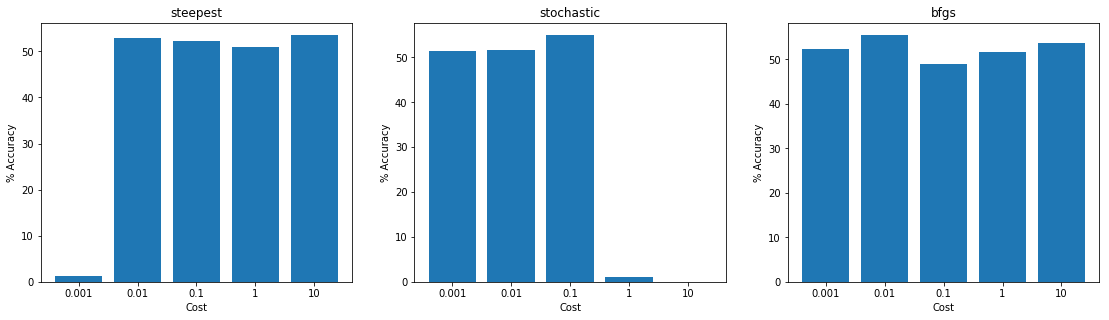

In [32]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=(15, 4))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)

for i in range(len(opt)):
    plt.subplot(1, 3, i+1)
    y_pos = np.arange(len(acc_set[i]))
    plt.bar(y_pos, acc_set[i])
    plt.xticks(y_pos, C_val)
    plt.xlabel('Cost')
    plt.ylabel('% Accuracy')
    plt.title(opt[i])
plt.show()

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(solver='lbfgs')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lg.fit(X_train, y_train)

yhat = lg.predict(X_test)
sk_acc = accuracy_score(y_test,yhat) * 100
print('Accuracy of: ',sk_acc, '%')

In [ ]:
%%time
mlr = MultiClassLogisticRegression(eta=0.01,iterations=5,C=0.01,optimized_tech='bfgs',norm='l2')
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    
mlr.fit(X_train,y_train)
yhat = mlr.predict(X_test)
acc = accuracy_score(y_test,yhat) * 100
print('BFGS gives an accuracy of: ', acc, '%')

In [ ]:
#Training time - Classification performance
#Reference: Matplotlib - Group bar charts with units (https://matplotlib.org/gallery/units/bar_unit_demo.html)

lr_technique = ['Scikit-learn', 'Custom classifier']
accuracy = [sk_acc, acc]
train_time = [2.94, 1.05]

N = 2
fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars

p1 = ax.bar(ind, accuracy, width, color='blue', bottom=0)
p2 = ax.bar(ind + width, train_time, width, color='orange', bottom=0)

ax.set_title('Performance comparison')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(lr_technique)

ax.legend((p1[0], p2[0]), ('% Accuracy', 'Training time'))
ax.autoscale_view()

plt.show()

In [ ]:
# Reference: Notes on MSE Gradients for Neural Networks by David Meyer (http://www.1-4-5.net/~dmm/ml/mse.pdf)
class MSELogisticRegression(BinaryLogisticRegression):
    
    def objective_function(self,X,y,g):
        return np.sum(g[y==1])*np.sum(1-g[y==0])

    def _get_gradient(self, X, y):
        self.w_ = np.squeeze(self.w_, axis = 1)
        g = expit(X @ self.w_)
        ydiff = y-g # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis] * self.objective_function(X, y, g), axis=0) * -2
        gradient = gradient.reshape(self.w_.shape)
        if self.norm.lower() == 'l1':
            gradient[1:] += np.abs(self.w_[1:])/self.w_[1:] * self.C
        elif self.norm.lower() == 'l2':
            gradient[1:] += -2 * self.w_[1:] * self.C
        elif self.norm.lower() == 'both':
            gradient[1:] += (np.abs(self.w_[1:])/self.w_[1:] * self.C) + (-2 * self.w_[1:] * self.C)
    
        return -gradient
    

In [ ]:
%%time
mlr = MultiClassLogisticRegression(eta=0.1,iterations=1,C=0.01,optimized_tech='mse',norm='l2')
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    
mlr.fit(X_train,y_train)
yhat = mlr.predict(X_test)
acc = accuracy_score(y_test,yhat) * 100
print('accuracy of: %.2f' %acc, '%')